In [51]:
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D , Dropout
from keras import initializers , optimizers , activations
from tensorflow.keras.callbacks import LearningRateScheduler


# Preprocessing

In [311]:
(X_train0, y_train0), (X_test0, y_test0) = keras.datasets.cifar10.load_data()
combined_features = np.concatenate((X_train0, X_test0))
combined_targets = np.concatenate((y_train0, y_test0))
x_train, x_test, y_train, y_test = train_test_split(combined_features,combined_targets ,test_size = 0.15 ,random_state = 42 )

In [312]:
x_train, x_test = x_train/255.0, x_test/255.0

# Define CNN Model

#### In above model we have 12 layers which in each layer:
##### Conv2D layer with 40 kernels(filters) with shap of (4,4)
##### MaxPooling2D layer with a shape of (2,2) for pool size
##### Conv2D layer with 80 kernels(filters) with shap of (2,2)
##### MaxPooling2D layer with a shape of (2,2) for pool size
##### Conv2D layer with 200 kernels(filters) with shap of (2,2)
##### MaxPooling2D layer with a shape of (2,2) for pool size
##### Flatten layer to flat the previous layer
##### Dense layer with 100 neurons
##### Dropout with rate 0f 0.3 to prevent overfitting
##### Dense layer with 50 neurons
##### Dropout with rate 0f 0.3 to prevent overfitting
##### last layer (Dense) with 10 neurons based on the number of classess

In [258]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(40 , 4 , activation = 'relu', padding = 'same' , input_shape = [32,32,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(80 , 2 , activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200 , 2 , activation = 'relu' , padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10 , activation = 'softmax')])


In [259]:
model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [260]:
model1.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_147 (Conv2D)         (None, 32, 32, 40)        1960      
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 16, 16, 40)       0         
 ng2D)                                                           
                                                                 
 conv2d_148 (Conv2D)         (None, 16, 16, 80)        12880     
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 8, 8, 80)         0         
 ng2D)                                                           
                                                                 
 conv2d_149 (Conv2D)         (None, 8, 8, 200)         64200     
                                                                 
 max_pooling2d_146 (MaxPooli  (None, 4, 4, 200)      

In [261]:
start_time_cnn_model = time.time()
history_cnn = model1.fit(x_train, y_train, epochs=50, validation_split=0.15)
training_time_cnn_model = time.time() - start_time_cnn_model

Epoch 1/50
1355/1355 [==============================] - 44s 32ms/step - loss: 1.7612 - accuracy: 0.3391 - val_loss: 1.3191 - val_accuracy: 0.5216
Epoch 2/50
1355/1355 [==============================] - 43s 32ms/step - loss: 1.3842 - accuracy: 0.4995 - val_loss: 1.1756 - val_accuracy: 0.5766
Epoch 3/50
1355/1355 [==============================] - 43s 32ms/step - loss: 1.2243 - accuracy: 0.5620 - val_loss: 1.0609 - val_accuracy: 0.6288
Epoch 4/50
1355/1355 [==============================] - 43s 32ms/step - loss: 1.1192 - accuracy: 0.6068 - val_loss: 0.9775 - val_accuracy: 0.6549
Epoch 5/50
1355/1355 [==============================] - 43s 32ms/step - loss: 1.0342 - accuracy: 0.6361 - val_loss: 0.9748 - val_accuracy: 0.6578
Epoch 6/50
1355/1355 [==============================] - 43s 32ms/step - loss: 0.9682 - accuracy: 0.6656 - val_loss: 0.8834 - val_accuracy: 0.6915
Epoch 7/50
1355/1355 [==============================] - 43s 32ms/step - loss: 0.9005 - accuracy: 0.6863 - val_loss: 0.8898 -

# Comparison 

In [262]:
# best model of last section
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(300, activation='relu' ,
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(150, activation='relu',
                       kernel_initializer="he_normal"))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
    
model2.compile(optimizer=optimizers.Adagrad(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time_model = time.time()
history_deep = model2.fit(x_train, y_train, epochs=50, validation_split=0.15)
training_time_model = time.time() - start_time_model


Epoch 1/50
1355/1355 [==============================] - 12s 9ms/step - loss: 4.9537 - accuracy: 0.2624 - val_loss: 3.0836 - val_accuracy: 0.3111
Epoch 2/50
1355/1355 [==============================] - 12s 9ms/step - loss: 2.5064 - accuracy: 0.3289 - val_loss: 2.0955 - val_accuracy: 0.3597
Epoch 3/50
1355/1355 [==============================] - 12s 9ms/step - loss: 2.0174 - accuracy: 0.3527 - val_loss: 1.8487 - val_accuracy: 0.3830
Epoch 4/50
1355/1355 [==============================] - 12s 9ms/step - loss: 1.8918 - accuracy: 0.3643 - val_loss: 1.7969 - val_accuracy: 0.3976
Epoch 5/50
1355/1355 [==============================] - 12s 9ms/step - loss: 1.8446 - accuracy: 0.3756 - val_loss: 1.8218 - val_accuracy: 0.3780
Epoch 6/50
1355/1355 [==============================] - 12s 9ms/step - loss: 1.8205 - accuracy: 0.3826 - val_loss: 1.7604 - val_accuracy: 0.3975
Epoch 7/50
1355/1355 [==============================] - 12s 9ms/step - loss: 1.8024 - accuracy: 0.3889 - val_loss: 1.7253 - val_ac

In [271]:
loss, accuracy = model1.evaluate(x_test, y_test)
loss, accuracy = model2.evaluate(x_test, y_test)

print("Test CNN model Loss:", loss)
print("Test CNN model Accuracy:", accuracy)
print("Test best model Loss:", loss)
print("Test best model Accuracy:", accuracy)

282/282 [==============================] - 1s 2ms/step - loss: 1.5616 - accuracy: 0.4663
Test CNN model Loss: 1.5616167783737183
Test CNN model Accuracy: 0.4663333296775818
Test best model Loss: 1.5616167783737183
Test best model Accuracy: 0.4663333296775818


In [273]:
print('The training time of CNN model is: ',training_time_cnn_model, '\nThe training time of best model is: ' ,  training_time_model)

The training time of CNN model is:  2129.2310268878937 
The training time of best model is:  588.7068290710449


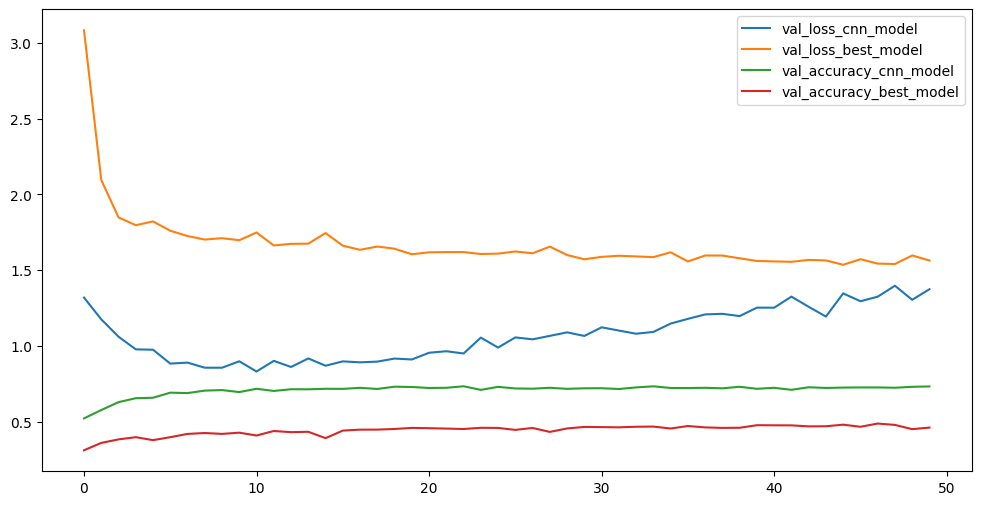

In [272]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(history_cnn.history["val_loss"], label="val_loss_cnn_model")
ax.plot(history_deep.history["val_loss"], label="val_loss_best_model")
ax.plot(history_cnn.history["val_accuracy"], label="val_accuracy_cnn_model")
ax.plot(history_deep.history["val_accuracy"], label="val_accuracy_best_model")
ax.legend()

# Comparison of Exponential and OneCycle

## Exponential

In [201]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(40 , 4 , activation = 'relu', padding = 'same' , input_shape = [32,32,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(80 , 2 , activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200 , 2 , activation = 'relu' , padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10 , activation = 'softmax')])


In [202]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [203]:
def exp_lr_func(eta0, s):
  def exp_lr(epoch):
    return eta0*0.1**(epoch/s)
  return exp_lr
exp_lr_s = exp_lr_func(0.001, 20)  

In [204]:
exp_lr_c = keras.callbacks.LearningRateScheduler(exp_lr_s)

In [205]:
start_time_cnn_model = time.time()
history_exp = model3.fit(x_train, y_train, epochs=50, validation_split = 0.15, callbacks=[exp_lr_c])
training_time_exp = time.time() - start_time_cnn_model

Epoch 1/50
1355/1355 [==============================] - 41s 30ms/step - loss: 1.7788 - accuracy: 0.3252 - val_loss: 1.4469 - val_accuracy: 0.4865 - lr: 0.0010
Epoch 2/50
1355/1355 [==============================] - 40s 29ms/step - loss: 1.4211 - accuracy: 0.4762 - val_loss: 1.1843 - val_accuracy: 0.5715 - lr: 8.9125e-04
Epoch 3/50
1355/1355 [==============================] - 40s 30ms/step - loss: 1.2665 - accuracy: 0.5430 - val_loss: 1.1033 - val_accuracy: 0.6042 - lr: 7.9433e-04
Epoch 4/50
1355/1355 [==============================] - 41s 30ms/step - loss: 1.1439 - accuracy: 0.5869 - val_loss: 1.0372 - val_accuracy: 0.6361 - lr: 7.0795e-04
Epoch 5/50
1355/1355 [==============================] - 40s 30ms/step - loss: 1.0614 - accuracy: 0.6189 - val_loss: 0.9783 - val_accuracy: 0.6549 - lr: 6.3096e-04
Epoch 6/50
1355/1355 [==============================] - 40s 30ms/step - loss: 0.9884 - accuracy: 0.6504 - val_loss: 0.9620 - val_accuracy: 0.6627 - lr: 5.6234e-04
Epoch 7/50
1355/1355 [====

## OneCycle

In [230]:
class Exp_lr(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.lr = []
        self.loss = []
  
    def on_epoch_begin(self, epoch, logs):
        self.previous_loss = 0
  
    def on_batch_end(self, batch, logs):
        current_loss = logs["loss"]*(batch+1) - self.previous_loss*batch
        self.previous_loss = logs["loss"]
        self.lr.append(keras.backend.get_value(self.model.optimizer.learning_rate))
        self.loss.append(current_loss)
        keras.backend.set_value(self.model.optimizer.learning_rate,
                            self.model.optimizer.learning_rate*self.factor)

In [231]:
def search_lr_loss(model, X, y, epochs=1, batch_size=32,
                   min_lr = 1e-6, max_lr = 10):
    model_weights = model.get_weights()
    iterations = int(X.shape[0]/batch_size)*epochs
    factor = np.exp(np.log(max_lr/min_lr)/iterations)
    initial_lr = keras.backend.get_value(model.optimizer.learning_rate)
    keras.backend.set_value(model.optimizer.learning_rate, min_lr)
    epx_lr = Exp_lr(factor)
    history_1cyle = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                      callbacks=[epx_lr])
    keras.backend.set_value(model.optimizer.learning_rate, initial_lr)
    model.set_weights(model_weights)
    return epx_lr.lr, epx_lr.loss

In [232]:
model4 = keras.models.Sequential([
    keras.layers.Conv2D(40 , 4 , activation = 'relu', padding = 'same' , input_shape = [32,32,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(80 , 2 , activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200 , 2 , activation = 'relu' , padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10 , activation = 'softmax')])


In [233]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [234]:
lr, loss = search_lr_loss(model4, x_train, y_train)

1594/1594 [==============================] - 47s 28ms/step - loss: 2.4480 - accuracy: 0.1390


(0.0, 6.0)

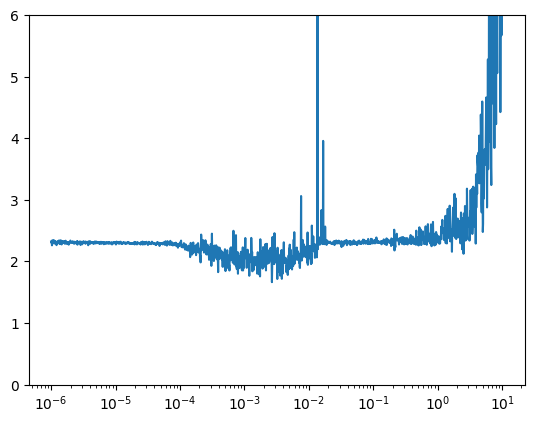

In [235]:
plt.plot(lr, loss)
plt.xscale("log")
plt.ylim(0, 6)

In [244]:
class One_cycle_lr(keras.callbacks.Callback):
  def __init__(self, iterations, max_lr, init_lr=None,
               final_steps=None, final_lr=None):
    self.iterations = iterations
    self.max_lr = max_lr
    self.init_lr = init_lr or max_lr / 10
    self.final_steps = final_steps or int(iterations/10)+1
    self.half_iterations = int((iterations - self.final_steps)/2)
    self.final_lr = final_lr or self.init_lr/1000
    self.iteration = 0
  
  def interpolation(self, y2, y1, x2, x1):
    return (y2 - y1)/(x2 - x1)*(self.iteration - x1) + y1
  
  def on_batch_begin(self, batch, logs):
    if self.iteration < self.half_iterations:
      lr = self.interpolation(self.max_lr, self.init_lr,
                              self.half_iterations, 0)
    elif self.iteration < 2*self.half_iterations:
      lr = self.interpolation(self.init_lr, self.max_lr,
                              2*self.half_iterations, self.half_iterations)
    else:
      lr = self.interpolation(self.final_lr, self.init_lr,
                              self.iterations, 2*self.half_iterations)
    self.iteration += 1
    keras.backend.set_value(self.model.optimizer.learning_rate, lr)

In [245]:
model5 = keras.models.Sequential([
    keras.layers.Conv2D(40 , 4 , activation = 'relu', padding = 'same' , input_shape = [32,32,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(80 , 2 , activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200 , 2 , activation = 'relu' , padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10 , activation = 'softmax')])


In [246]:
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [247]:
epochs = 50
batch_size = 32
iters = int(x_train.shape[0]/batch_size)*epochs
one_cycle_lr = One_cycle_lr(iters, max_lr=0.002)
history_onecycle = model5.fit(x_train, y_train,
                             validation_split=0.15,
                             epochs=epochs,
                             callbacks=[one_cycle_lr])

Epoch 1/50
1355/1355 [==============================] - 44s 32ms/step - loss: 1.8711 - accuracy: 0.2957 - val_loss: 1.5256 - val_accuracy: 0.4511
Epoch 2/50
1355/1355 [==============================] - 41s 30ms/step - loss: 1.5234 - accuracy: 0.4438 - val_loss: 1.3346 - val_accuracy: 0.5125
Epoch 3/50
1355/1355 [==============================] - 42s 31ms/step - loss: 1.3498 - accuracy: 0.5136 - val_loss: 1.1544 - val_accuracy: 0.5809
Epoch 4/50
1355/1355 [==============================] - 41s 31ms/step - loss: 1.2190 - accuracy: 0.5669 - val_loss: 1.0441 - val_accuracy: 0.6302
Epoch 5/50
1355/1355 [==============================] - 42s 31ms/step - loss: 1.1132 - accuracy: 0.6084 - val_loss: 0.9976 - val_accuracy: 0.6579
Epoch 6/50
1355/1355 [==============================] - 42s 31ms/step - loss: 1.0320 - accuracy: 0.6424 - val_loss: 0.9567 - val_accuracy: 0.6731
Epoch 7/50
1355/1355 [==============================] - 42s 31ms/step - loss: 0.9620 - accuracy: 0.6716 - val_loss: 0.9705 -

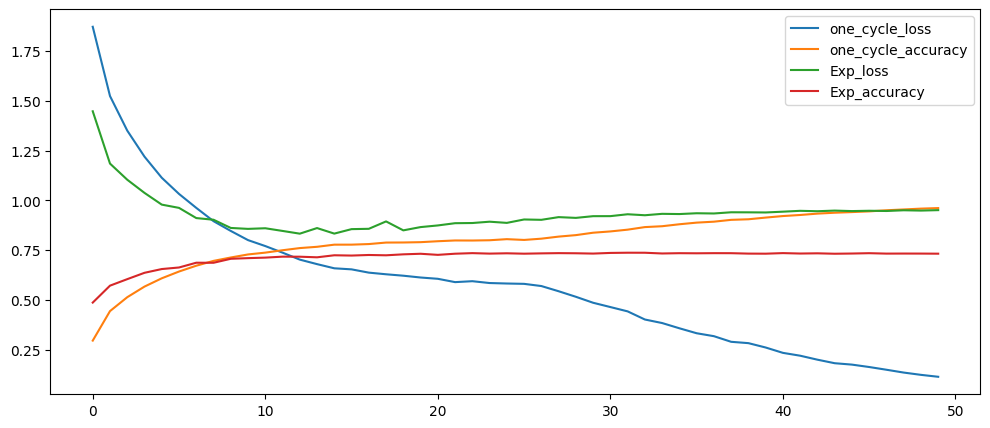

In [248]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_onecycle.history["loss"], label="one_cycle_loss")
ax.plot(history_onecycle.history["accuracy"], label="one_cycle_accuracy")
ax.plot(history_exp.history["val_loss"], label="Exp_loss")
ax.plot(history_exp.history["val_accuracy"], label="Exp_accuracy")
ax.legend()

# Model without Pooling layers

In [255]:
model6 = keras.models.Sequential([
    keras.layers.Conv2D(40 , 4 , activation = 'relu', padding = 'same' , input_shape = [32,32,3]),
    keras.layers.Conv2D(80 , 2 , activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(200 , 2 , activation = 'relu' , padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10 , activation = 'softmax')])

In [256]:
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [257]:
start_time_no_pooling = time.time()
history_no_pooling = model6.fit(x_train, y_train, epochs=50, validation_split=0.15)
training_time_no_pooling = time.time() - start_time_no_pooling

Epoch 1/50
1355/1355 [==============================] - 397s 292ms/step - loss: 1.7760 - accuracy: 0.3515 - val_loss: 1.4102 - val_accuracy: 0.4914
Epoch 2/50
1355/1355 [==============================] - 394s 291ms/step - loss: 1.4154 - accuracy: 0.4893 - val_loss: 1.2374 - val_accuracy: 0.5558
Epoch 3/50
1355/1355 [==============================] - 393s 290ms/step - loss: 1.2277 - accuracy: 0.5634 - val_loss: 1.1473 - val_accuracy: 0.6012
Epoch 4/50
1355/1355 [==============================] - 392s 290ms/step - loss: 1.0704 - accuracy: 0.6188 - val_loss: 1.1150 - val_accuracy: 0.6156
Epoch 5/50
1355/1355 [==============================] - 392s 290ms/step - loss: 0.9247 - accuracy: 0.6669 - val_loss: 1.0763 - val_accuracy: 0.6335
Epoch 6/50
1355/1355 [==============================] - 392s 289ms/step - loss: 0.8018 - accuracy: 0.7153 - val_loss: 1.1182 - val_accuracy: 0.6369
Epoch 7/50
1355/1355 [==============================] - 392s 289ms/step - loss: 0.6853 - accuracy: 0.7550 - val_

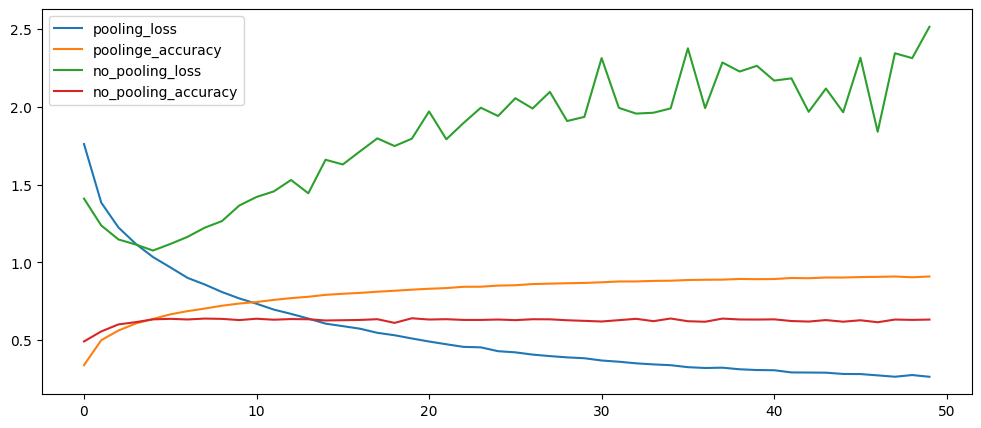

In [274]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_cnn.history["loss"], label="pooling_loss")
ax.plot(history_cnn.history["accuracy"], label="poolinge_accuracy")
ax.plot(history_no_pooling.history["val_loss"], label="no_pooling_loss")
ax.plot(history_no_pooling.history["val_accuracy"], label="no_pooling_accuracy")
ax.legend()

In [275]:
print('The training time of the model with pooling layers is: ',training_time_cnn_model, '\nThe training time of the model without pooling layers is: ' ,  training_time_no_pooling)

The training time of the model with pooling layers is:  2129.2310268878937 
The training time of the model without pooling layers is:  19627.528348207474


# Model with Pooling layers (stride 2 and 4)

### strides = 2

In [263]:
model7 = keras.models.Sequential([
    keras.layers.Conv2D(40 , 4 , activation = 'relu', padding = 'same' , input_shape = [32,32,3]),
    keras.layers.MaxPooling2D(2 , strides=(2,2)),
    keras.layers.Conv2D(80 , 2 , activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2 , strides = (2,2)),
    keras.layers.Conv2D(200 , 2 , activation = 'relu' , padding = 'same'),
    keras.layers.MaxPooling2D(2 , strides = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10 , activation = 'softmax')])

In [264]:
model7.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [265]:
start_time_2_pooling = time.time()
history_2_pooling = model7.fit(x_train, y_train, epochs=50, validation_split=0.15)
training_time_2_pooling = time.time() - start_time_2_pooling

Epoch 1/50
1355/1355 [==============================] - 44s 32ms/step - loss: 1.7573 - accuracy: 0.3445 - val_loss: 1.3777 - val_accuracy: 0.5061
Epoch 2/50
1355/1355 [==============================] - 44s 32ms/step - loss: 1.3753 - accuracy: 0.5041 - val_loss: 1.1605 - val_accuracy: 0.5886
Epoch 3/50
1355/1355 [==============================] - 43s 32ms/step - loss: 1.2108 - accuracy: 0.5726 - val_loss: 1.0969 - val_accuracy: 0.6132
Epoch 4/50
1355/1355 [==============================] - 43s 32ms/step - loss: 1.0921 - accuracy: 0.6195 - val_loss: 1.0142 - val_accuracy: 0.6497
Epoch 5/50
1355/1355 [==============================] - 43s 32ms/step - loss: 1.0071 - accuracy: 0.6506 - val_loss: 0.9634 - val_accuracy: 0.6680
Epoch 6/50
1355/1355 [==============================] - 43s 32ms/step - loss: 0.9348 - accuracy: 0.6759 - val_loss: 0.9399 - val_accuracy: 0.6770
Epoch 7/50
1355/1355 [==============================] - 43s 31ms/step - loss: 0.8789 - accuracy: 0.6977 - val_loss: 0.8943 -

### strides = 4 

In [266]:
model8 = keras.models.Sequential([
    keras.layers.Conv2D(40 , 4 , activation = 'relu', padding = 'same' , input_shape = [32,32,3]),
    keras.layers.MaxPooling2D(2 , strides=(4,4)),
    keras.layers.Conv2D(80 , 2 , activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2 , strides=(4,4)),
    keras.layers.Conv2D(200 , 2 , activation = 'relu' , padding = 'same'),
    keras.layers.MaxPooling2D(2 , strides=(4,4)),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10 , activation = 'softmax')])

In [267]:
model8.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [268]:
start_time_4_pooling = time.time()
history_4_pooling = model8.fit(x_train, y_train, epochs=50, validation_split=0.15)
training_time_4_pooling = time.time() - start_time_4_pooling

Epoch 1/50
1355/1355 [==============================] - 25s 18ms/step - loss: 1.8202 - accuracy: 0.3223 - val_loss: 1.5206 - val_accuracy: 0.4322
Epoch 2/50
1355/1355 [==============================] - 23s 17ms/step - loss: 1.5273 - accuracy: 0.4452 - val_loss: 1.3998 - val_accuracy: 0.4812
Epoch 3/50
1355/1355 [==============================] - 23s 17ms/step - loss: 1.3951 - accuracy: 0.4974 - val_loss: 1.3321 - val_accuracy: 0.5235
Epoch 4/50
1355/1355 [==============================] - 24s 17ms/step - loss: 1.3101 - accuracy: 0.5337 - val_loss: 1.2645 - val_accuracy: 0.5503
Epoch 5/50
1355/1355 [==============================] - 23s 17ms/step - loss: 1.2418 - accuracy: 0.5616 - val_loss: 1.2550 - val_accuracy: 0.5463
Epoch 6/50
1355/1355 [==============================] - 23s 17ms/step - loss: 1.1814 - accuracy: 0.5835 - val_loss: 1.2363 - val_accuracy: 0.5575
Epoch 7/50
1355/1355 [==============================] - 23s 17ms/step - loss: 1.1311 - accuracy: 0.6029 - val_loss: 1.1985 -

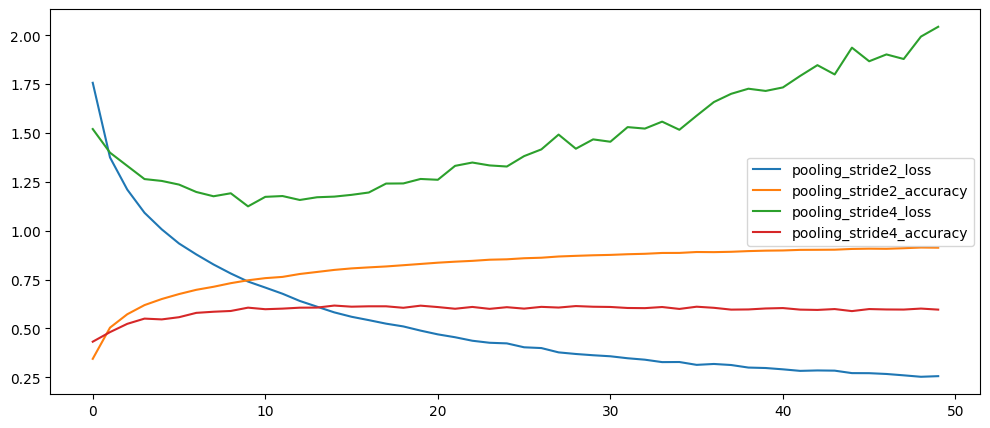

In [276]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_2_pooling.history["loss"], label="pooling_stride2_loss")
ax.plot(history_2_pooling.history["accuracy"], label="pooling_stride2_accuracy")
ax.plot(history_4_pooling.history["val_loss"], label="pooling_stride4_loss")
ax.plot(history_4_pooling.history["val_accuracy"], label="pooling_stride4_accuracy")
ax.legend()

# Using a powerfull model

## All layers untrainable

In [347]:
vgg_base = keras.applications.VGG16(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(vgg_base.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model9 = keras.Model(inputs=vgg_base.input, outputs=output)

In [348]:
for layer in vgg_base.layers:
    layer.trainable = False

In [349]:
model9.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [350]:
model9.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0  

In [353]:
history_vgg= model9.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1355/1355 [==============================] - 96s 70ms/step - loss: 1.5633 - accuracy: 0.4678 - val_loss: 1.3978 - val_accuracy: 0.5261
Epoch 2/50
1355/1355 [==============================] - 91s 67ms/step - loss: 1.3258 - accuracy: 0.5477 - val_loss: 1.3260 - val_accuracy: 0.5435
Epoch 3/50
1355/1355 [==============================] - 91s 67ms/step - loss: 1.2637 - accuracy: 0.5698 - val_loss: 1.2805 - val_accuracy: 0.5638
Epoch 4/50
1355/1355 [==============================] - 91s 67ms/step - loss: 1.2281 - accuracy: 0.5783 - val_loss: 1.2574 - val_accuracy: 0.5685
Epoch 5/50
1355/1355 [==============================] - 91s 67ms/step - loss: 1.2041 - accuracy: 0.5876 - val_loss: 1.2411 - val_accuracy: 0.5732
Epoch 6/50
1355/1355 [==============================] - 90s 67ms/step - loss: 1.1868 - accuracy: 0.5924 - val_loss: 1.2374 - val_accuracy: 0.5720
Epoch 7/50
1355/1355 [==============================] - 91s 67ms/step - loss: 1.1740 - accuracy: 0.5979 - val_loss: 1.2310 -

## Make last layer trainable

In [354]:
vgg_trainable_base = keras.applications.VGG16(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(vgg_trainable_base.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model10 = keras.Model(inputs=vgg_trainable_base.input, outputs=output)

In [355]:
for layer in vgg_trainable_base.layers:
      layer.trainable = False
vgg_trainable_base.layers[-2].trainable = True

In [356]:
model10.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0  

In [357]:
model10.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [358]:
history_vgg_trainable= model10.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1355/1355 [==============================] - 155s 114ms/step - loss: 1.2296 - accuracy: 0.5736 - val_loss: 1.1779 - val_accuracy: 0.5911
Epoch 2/50
1355/1355 [==============================] - 152s 112ms/step - loss: 1.0346 - accuracy: 0.6381 - val_loss: 1.0330 - val_accuracy: 0.6405
Epoch 3/50
1355/1355 [==============================] - 152s 112ms/step - loss: 0.9610 - accuracy: 0.6620 - val_loss: 1.0421 - val_accuracy: 0.6342
Epoch 4/50
1355/1355 [==============================] - 155s 114ms/step - loss: 0.9172 - accuracy: 0.6775 - val_loss: 1.0428 - val_accuracy: 0.6370
Epoch 5/50
1355/1355 [==============================] - 156s 115ms/step - loss: 0.8775 - accuracy: 0.6900 - val_loss: 0.9824 - val_accuracy: 0.6571
Epoch 6/50
1355/1355 [==============================] - 154s 114ms/step - loss: 0.8385 - accuracy: 0.7050 - val_loss: 1.0399 - val_accuracy: 0.6458
Epoch 7/50
1355/1355 [==============================] - 151s 112ms/step - loss: 0.8109 - accuracy: 0.7129 - val_

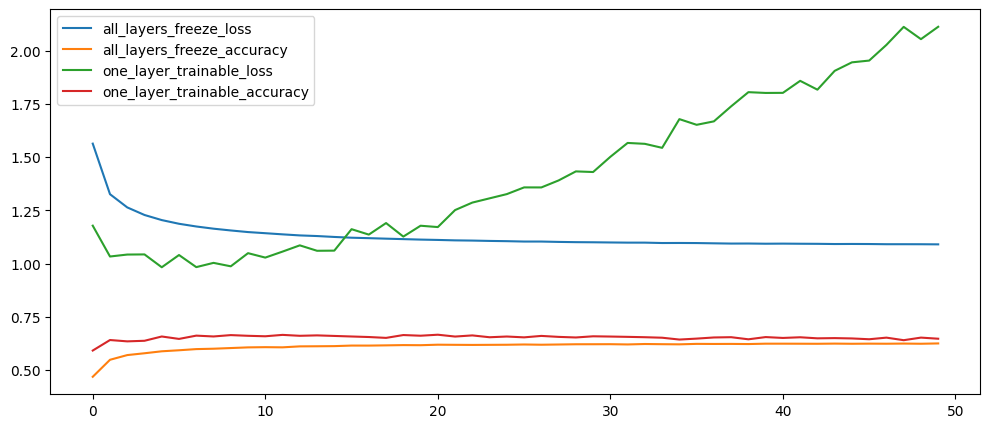

In [359]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_vgg.history["loss"], label="all_layers_freeze_loss")
ax.plot(history_vgg.history["accuracy"], label="all_layers_freeze_accuracy")
ax.plot(history_vgg_trainable.history["val_loss"], label="one_layer_trainable_loss")
ax.plot(history_vgg_trainable.history["val_accuracy"], label="one_layer_trainable_accuracy")
ax.legend()